# Project Overview

Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit menjadi jauh lebih berguna dan nyaman. Tapi apa sebenarnya kartu kredit itu? Secara sederhana, kartu kredit diartikan sebagai alat pembayaran berupa kartu yang biaya pembayarannya dalam suatu transaksi keuangan ditanggung terlebih dahulu oleh penerbit kartu. Setelah itu, pemegang kartu kredit wajib melunasi hutang pembayaran kartu tepat waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dari kartu debit uang asli nasabah, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Namun, dalam banyak hal, kartu kredit tidak berbeda dengan kartu debit.Perbedaannya hanya pada modal yang digunakan. Dana kartu kredit adalah saldo terutang yang dibatasi hingga jumlah tertentu.

Dataset yang akan digunakan berisi perilaku penggunaan sekitar 9000 pengguna kartu kredit selama enam bulan terakhir. Diperlukan pengelompokan nasabah kartu kredit ke dalam beberapa kelompok sesuai dengan perilaku nasabah untuk mendapatkan strategi pemasaran kartu kredit yang efektif dan efisien. Model yang digunakan pada project ini adalah model clustering K-Means, DBSCAN, dan K-Medoids.

#### Tahapan:
1. Melakukan eksplorasi dataset menggunakan berbagai jenis visualisasi data.
2. Melakukan preprocessing data sebelum menggunakan model.
3. Mengelompokkan pelanggan ke dalam beberapa cluster dengan menggunakan berbagai model clustering.
4. Melakukan interpretasi dan analisis terhadap kelompok-kelompok (profiling) yang telah dibuat.
5. Memberikan saran pemasaran berdasarkan hasil profiling dan analisis yang dilakukan.


##### Attribute Information

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases 
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


#### Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
* Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
* Mampu mempersiapkan data untuk digunakan dalam Clustering
* Mampu mengimplementasikan Clustering pada data yang diberikan

#### Tools:
* VsCode

# Import LIibrary

### Note:
Mungkin ada beberapa library yang harus di install yaitu:
- pip3 install yellowbrick
- pip3 install sklearn_extra
- ect, jika ada error itu karena library belum terinstall

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from math import isnan
from random import sample
from sklearn import metrics
from matplotlib import patches
from numpy.random import uniform
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Data Loading

In [22]:
# membuat columns dataset full
pd.set_option('display.max_columns', None)

# handle missing value
missing_values = ['na', "NA", 'NaN','-']

# read csv
df = pd.read_csv('CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [23]:
# Cek jumlah baris dan kolom
baris,kolom = df.shape
print('Dataset ini terdiri dari: ')
print(baris, 'baris')
print(kolom, 'kolom')

Dataset ini terdiri dari: 
8950 baris
18 kolom


In [24]:
# cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [25]:
# cek kolom
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [26]:
# cek deskriptif data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Pada beberapa kolom sepertinya memiliki outlier dan mean memiliki nilai yang lebih besar dibandingkan dengan median hal ini menunjukkan bahwa terdapat beberapa skewness pada dataset.

In [27]:
# Cek Misiing Value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [28]:
# Cek Duplikat Data
df.duplicated().sum()

0

Terdapat missing value pada fitur CREDIT_LIMIT dan MINIMUM_PAYMENTS.Ini akan dibersihkan di tahap selanjutnya. Dataset ini tidak memiliki data yang duplikat.

# Data Cleaning

In [29]:
# handle missing value dengan mean
col = ['CREDIT_LIMIT','MINIMUM_PAYMENTS']

# handle missing value dengan SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[col] = imputer.fit_transform(df[col])

In [30]:
# cek missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [31]:
# Drop CUST_ID karna tidak berpengaruh pada proses clustering
df.drop('CUST_ID', axis=1, inplace=True)

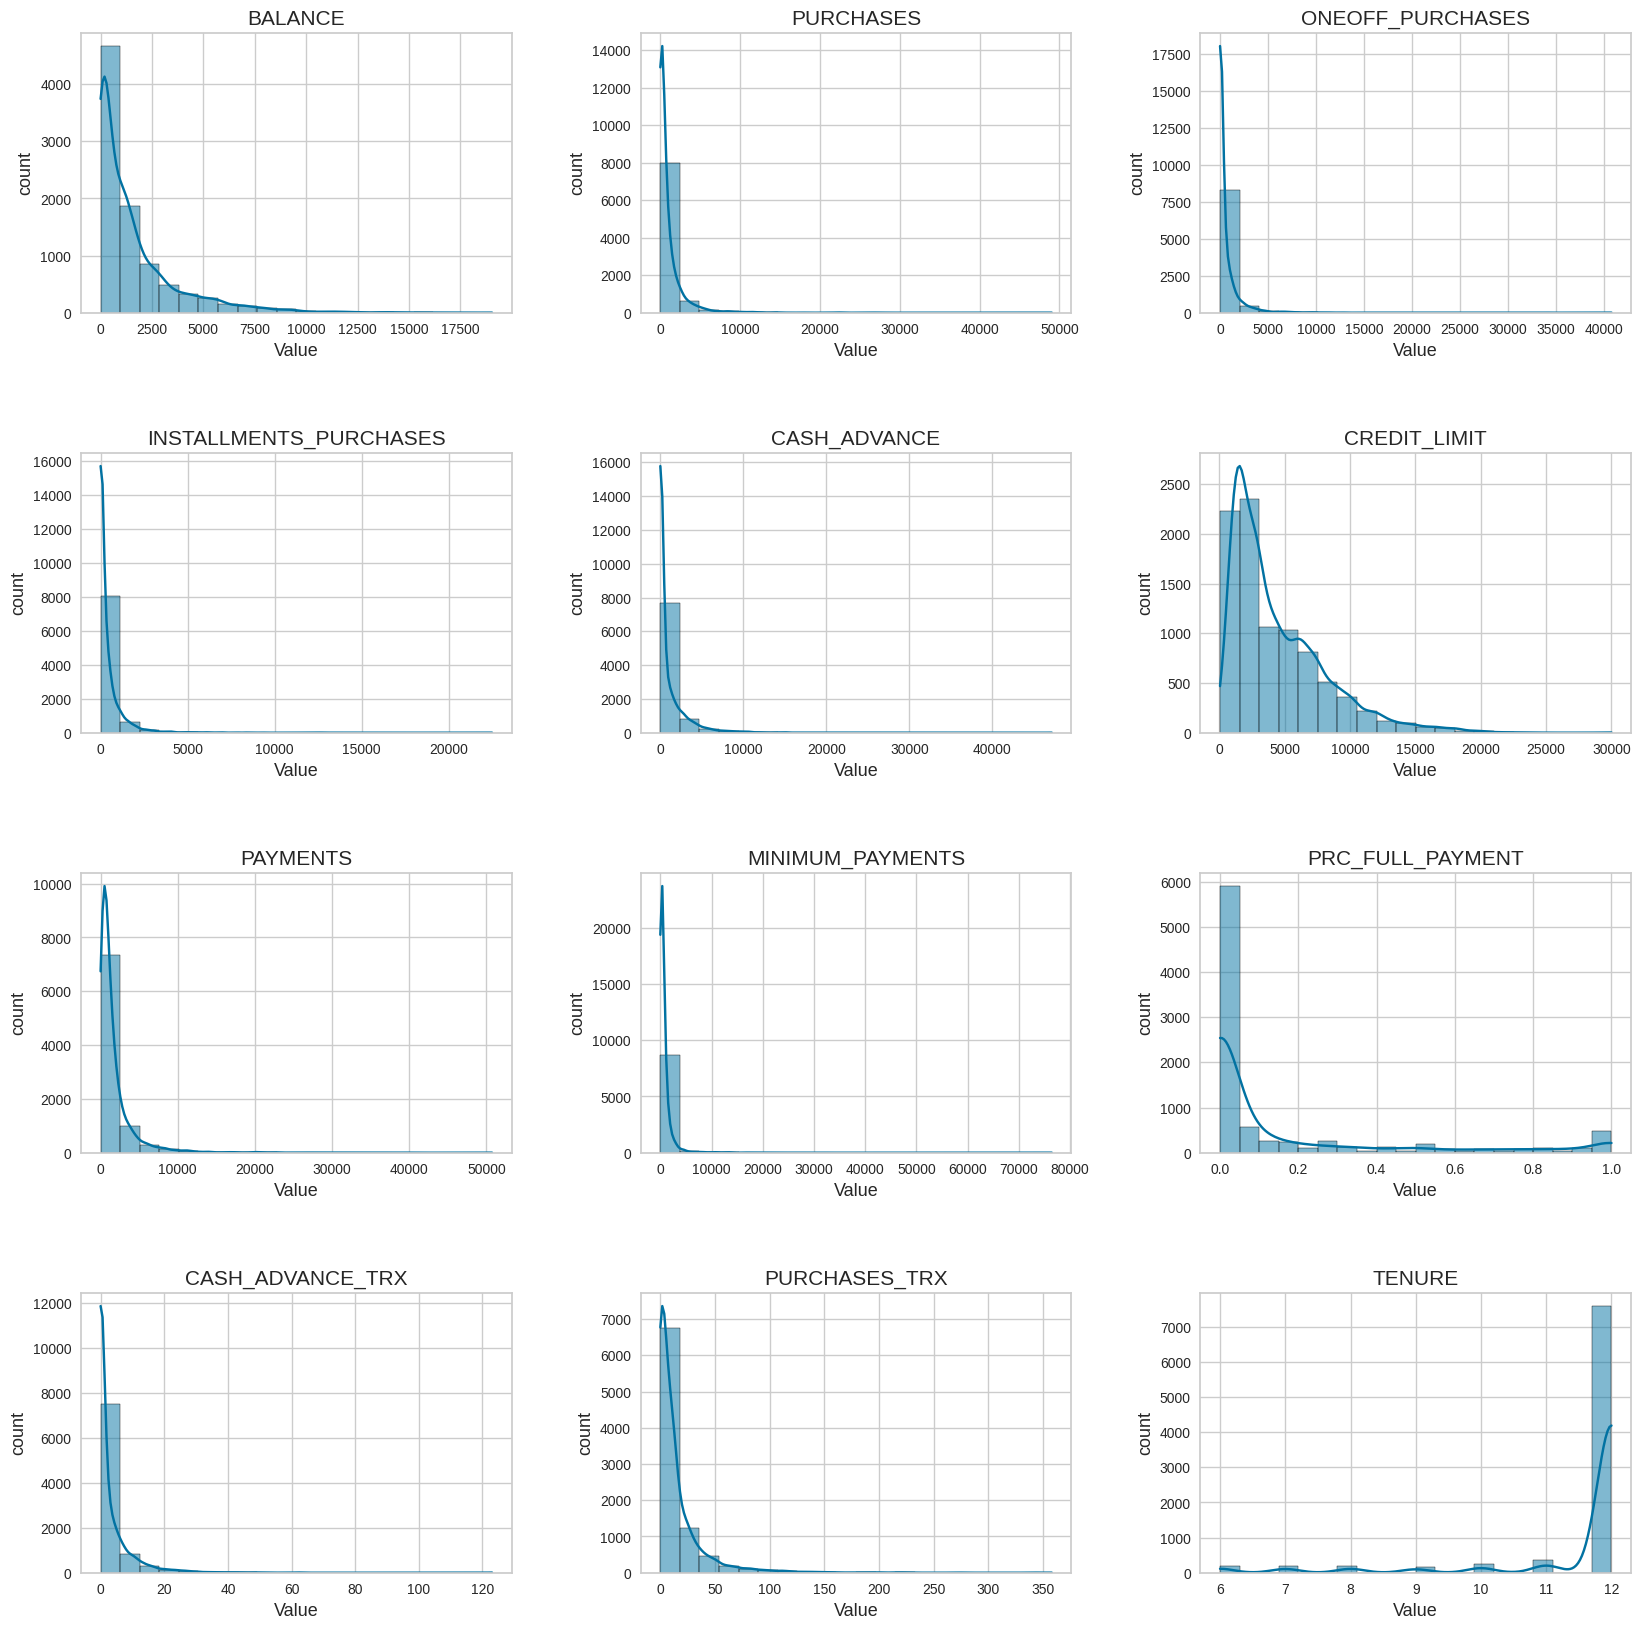

In [32]:
# cek skewness
var_col = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(4,3,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

Semua fitur diatas terlihat memiliki distribusi yang tidak normal, distribusi data tersebut mengalamai skewness

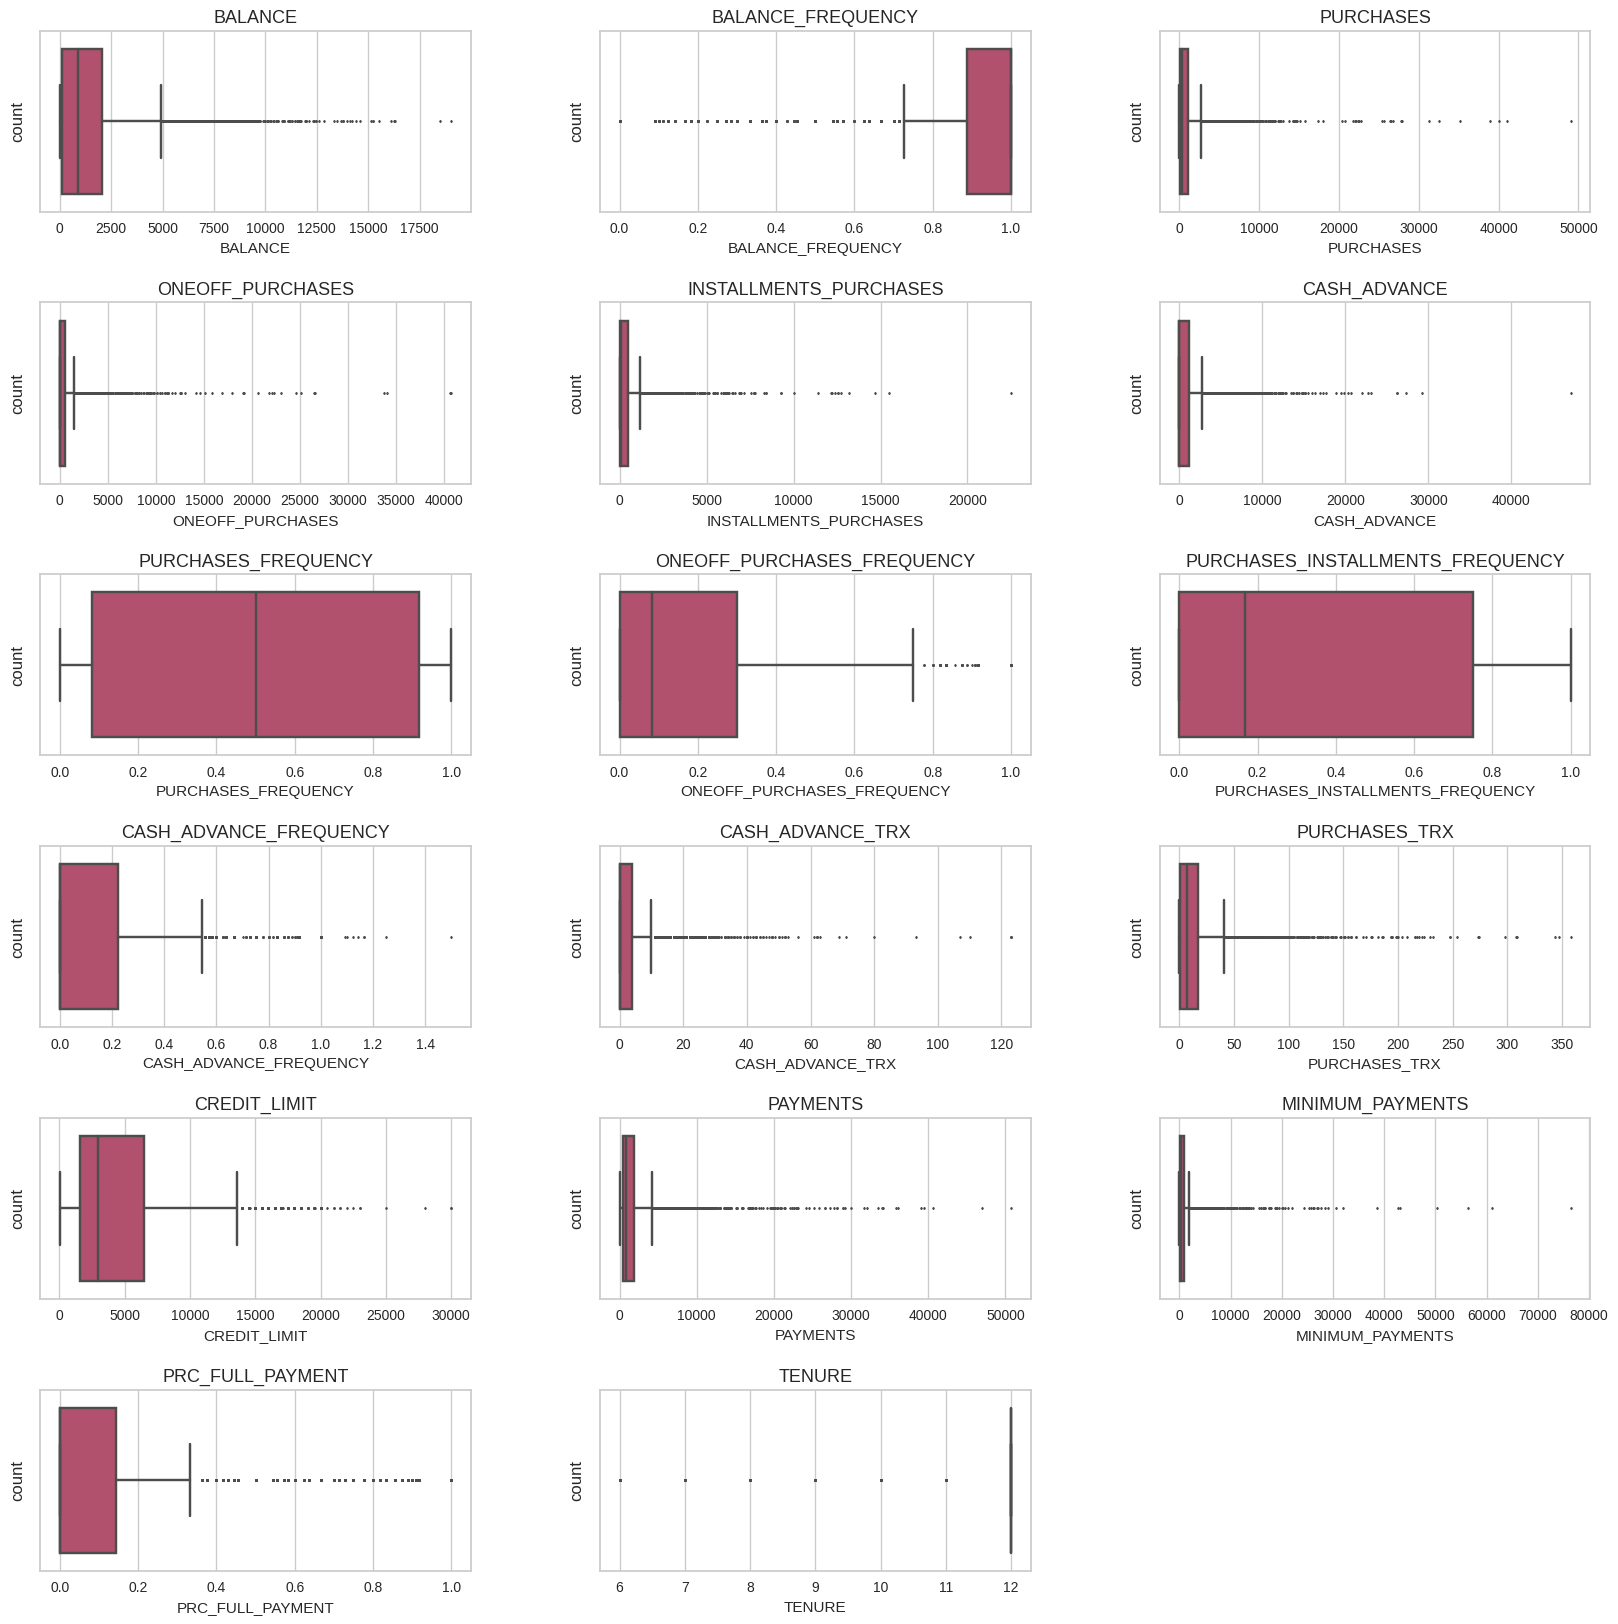

In [33]:
# cek outlier
from scipy.stats import skew

cols = df.columns.to_list()
plt.figure(figsize=(20,20))
for i, col in enumerate(cols):
    plt.subplot(6,3,i+1)
    plt.title(col, fontsize=13)
    plt.xlabel(f"skew of {col}:{skew(df[col])}")
    plt.ylabel("count",fontsize=12)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.boxplot(data=df, x=col, palette='flare', fliersize=1)

Terdapat banyak dari fitur - fitur ini memiliki outliers, tetapi outliers tersebut terlihat seperti natural outliers bukan terjadi karena kesalahan input atau pengukuran. Ada kemungkinan terdapat nasabah/pelanggan yang melakukan transaksi dengan nominal yang sangat besar. Sehingga kita bisa biarkan saja untuk menghindari kehilangan beberapa informasi.

# EDA

1.Credit Limit vs Balance based Tenure

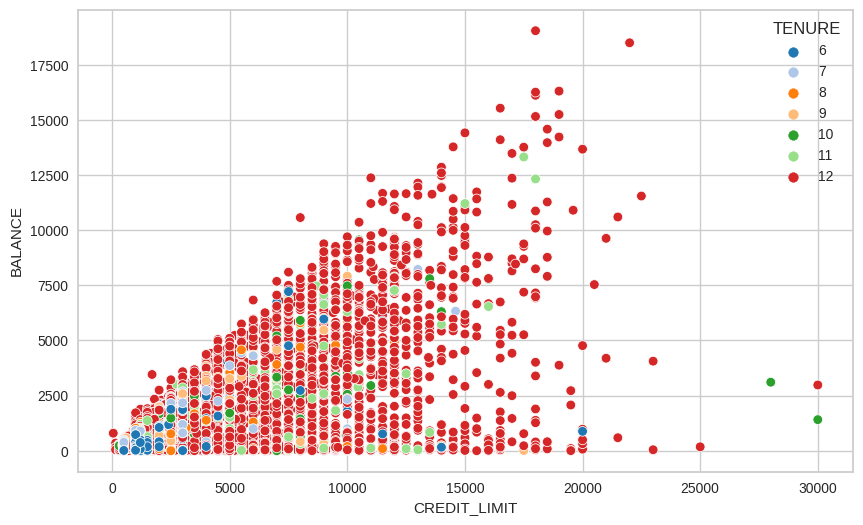

In [34]:
# Credit Limit vs. Balance based on Tenure
plt.figure(figsize=(10,6))
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df, hue='TENURE', palette='tab20')
plt.show()

**Insight:** Diagram scatterplot menunjukkan bahwa ketika nilai variabel meningkat, varian distribusi juga meningkat hingga membentuk kerucut. Selain itu, sebagian besar nasabah kartu kredit lebih memilih tenor 12 bulan.

2. Purchases Amount vs. Total Transaction

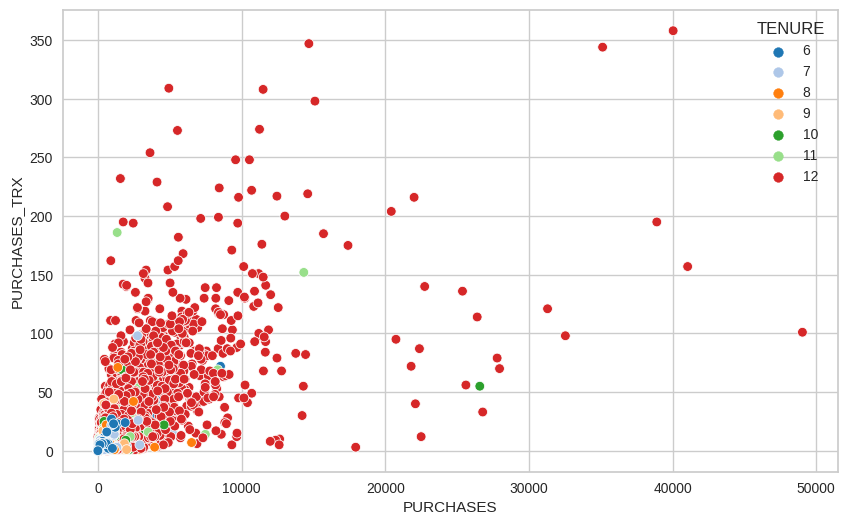

In [35]:
# Purchases Amount vs. Total Transaction
plt.figure(figsize=(10,6))
sns.scatterplot(x='PURCHASES', y='PURCHASES_TRX', data=df, hue='TENURE', palette='tab20')
plt.show()

**Insight:** Dari grafik di atas dapat disimpulkan bahwa nasabah kartu kredit dengan masa tenor 12 bulan bersedia mengambil jumlah pembelian dan memiliki total transaksi pembelian yang lebih banyak dibandingkan dengan nasabah dengan masa tenor lainnya. Dimana nasabah lebih cenderung membayar utang dalam jangka waktu yang lama, guna menaikkan suku bunga. Selain itu, beberapa nasabah sengaja tidak melakukan transaksi sama sekali (0 pembelian dan transaksi) untuk mendapatkan limit kredit yang tinggi, yang berdampak pada peningkatan skor kredit dan rasio penggunaan kredit.

3.Credit Limit vs. Installment Purchases

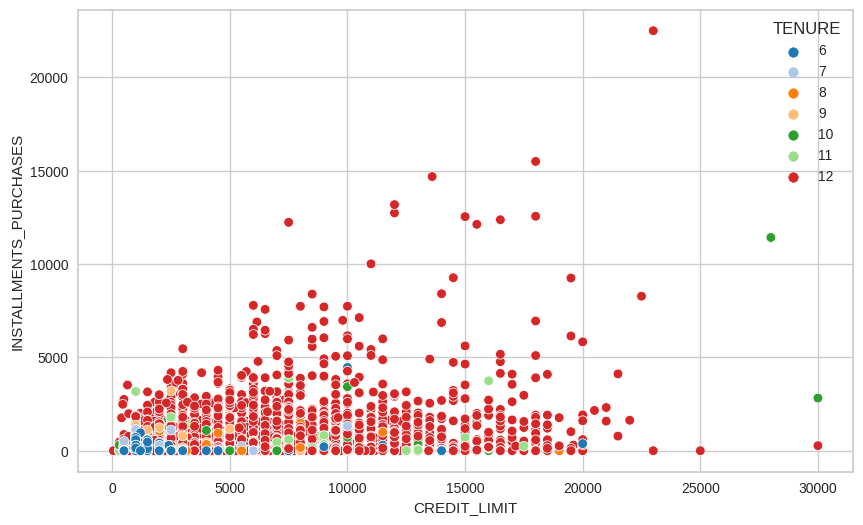

In [36]:
# Credit Limit vs. Installment Purchases
plt.figure(figsize=(10,6))
sns.scatterplot(x='CREDIT_LIMIT', y='INSTALLMENTS_PURCHASES', data=df, hue='TENURE', palette='tab20')
plt.show()

**Insight:** Scatterplot tidak menunjukkan korelasi antara kedua variabel karena plot sebar menunjukkan pola acak.

4. Korelasi antar variabel

<Axes: >

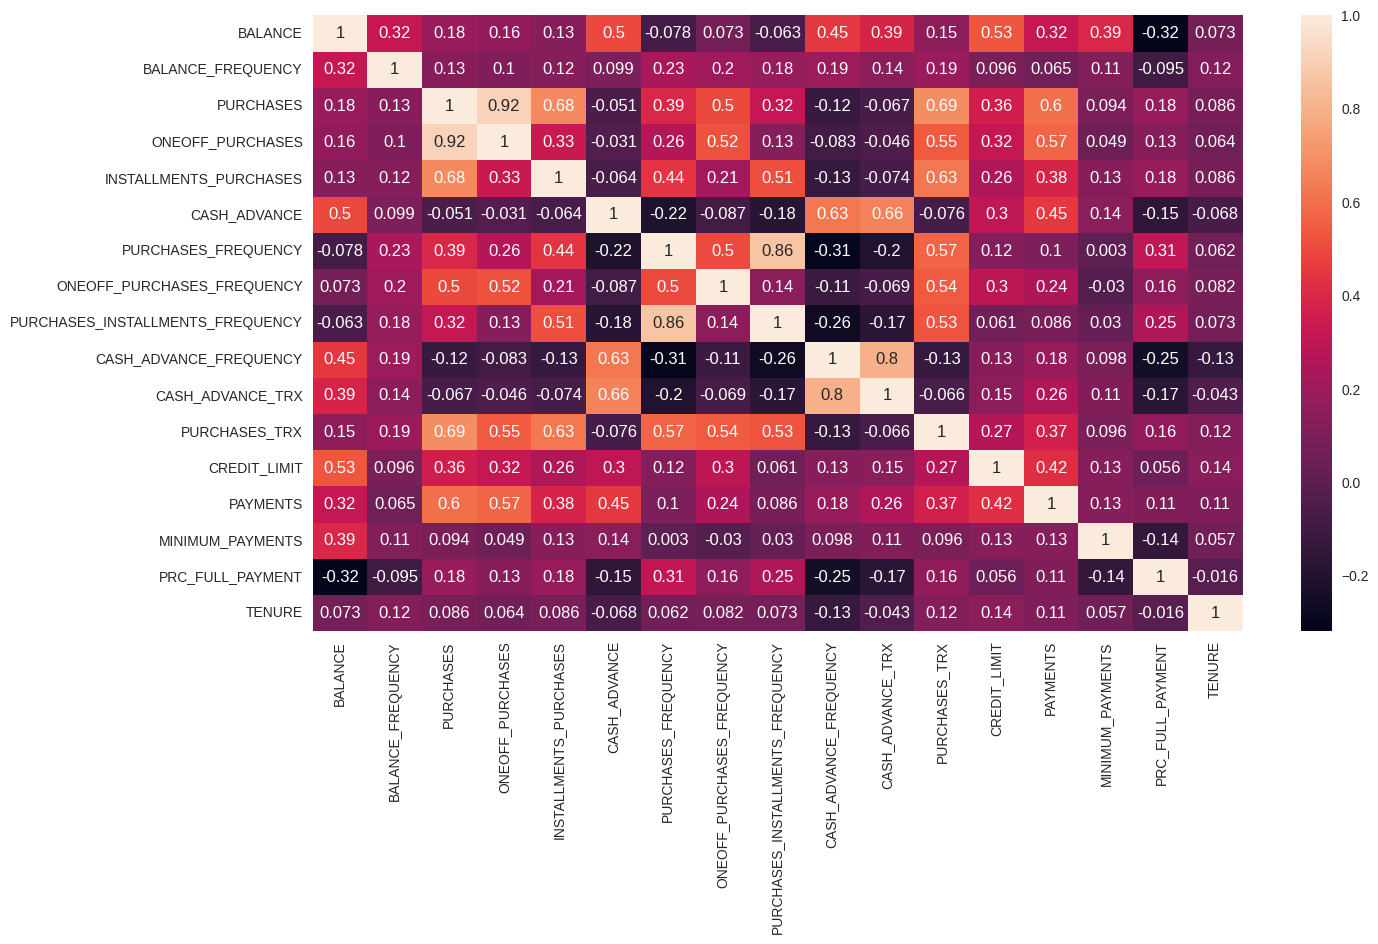

In [37]:
# cek korelasi
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)

variabel-variabel yang berkorelasi tinggi tidak berguna untuk algoritma segmentasi karena mereka merepresentasikan karakteristik yang sama dari sebuah segmen. variabel atau fitur yang memiliki korelasi tinggi yaitu PURCHASES dan ONEOFF_PURCHASES dengan skor 0.92, PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY dengan skor 0.86, CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX dengan skor 0.8. Daripada membuang fitur-fitur tersebut dan kehilangan informasi, Untuk menangani issue ini akan digunakan metode PCA yang mana dapat membantu mempertahankan informasi dan diwaktu yang sama bisa didapatkan variabel independent

# Preprocessing

##### Scaling Data
Pada projek ini teknik data scaler yaitu Standard Scaler.

In [38]:
# Scalling
Standar_Scaller = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [39]:
# describe data standar scaller
Standar_Scaller.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


Langkah selanjutnya adalah melakukan uji statistik menggunakan uji statistik Hopkins untuk dataset yang telah diproses sebelumnya untuk mengukur kecenderungan pengelompokan data (mengukur sejauh mana cluster ada dalam data yang akan dikelompokkan). **Hopkins Test** adalah sebuah metode statistik yang digunakan untuk mengukur kecenderungan dataset untuk cluster atau menggambarkan keberagaman data. Tujuan dari Hopkins Test adalah untuk menguji apakah dataset memiliki struktur cluster yang signifikan atau tidak.

In [40]:
# hopkins test
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)
    
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1,-1),2,return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1,-1),2,return_distance=True)
        wjd.append(w_dist[0][1])
    
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
    
    return H

print('Data yang akan digunakan adalah data yang sudah di scalling menggunakan Standar Scaller: ', hopkins(Standar_Scaller))

Data yang akan digunakan adalah data yang sudah di scalling menggunakan Standar Scaller:  0.9656571671552702


#### Principal component analysis (PCA)
PCA adalah metode yang digunakan dalam pembelajaran mesin tanpa pengawasan (seperti pengelompokan) yang mereduksi data berdimensi tinggi menjadi dimensi yang lebih kecil sambil mempertahankan informasi sebanyak mungkin. Dengan menggunakan PCA sebelum menerapkan algoritma clustering, memungkinkan untuk mengurangi dimensi, noise data, dan menurunkan biaya komputasi. Disini saya menggunakan hasil scalling Robust Scaller.

In [41]:
#Transform into Array
X = np.array(Standar_Scaller)

#Applying PCA
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

# Pendefinisian, Pelatihan, dan Evaluasi Data

# 1. K-Means

Clustering K-means adalah algoritma pembelajaran tanpa pengawasan sederhana yang digunakan untuk memecahkan masalah pengelompokan. Ini mengikuti prosedur sederhana untuk mengklasifikasikan kumpulan data yang diberikan ke dalam sejumlah cluster, yang ditentukan oleh huruf "k", yang diperbaiki sebelumnya.

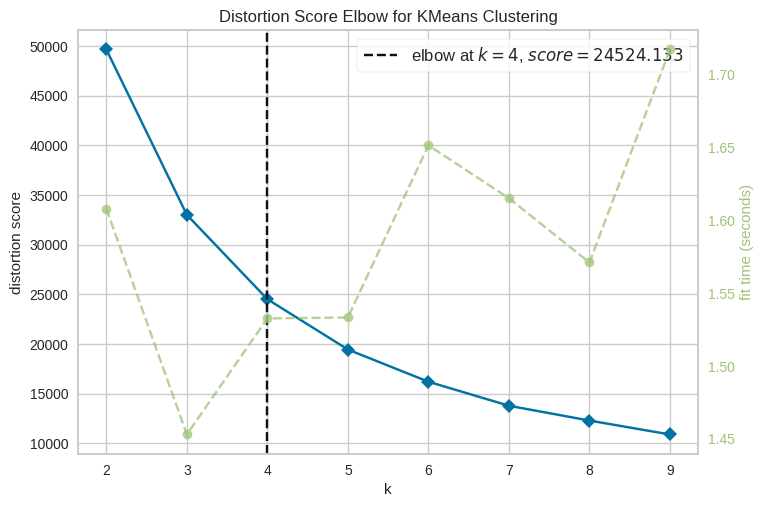

In [42]:
# cek berapa banyak cluster yang dapat dibuat
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X)
visualizer.show()
plt.show()

#### Skor Calinski Harabasz menunjukkan seberapa banyak data tersebar di antara dan di dalam cluster

In [43]:
metrics.calinski_harabasz_score(X,model.labels_)

6301.488477139074

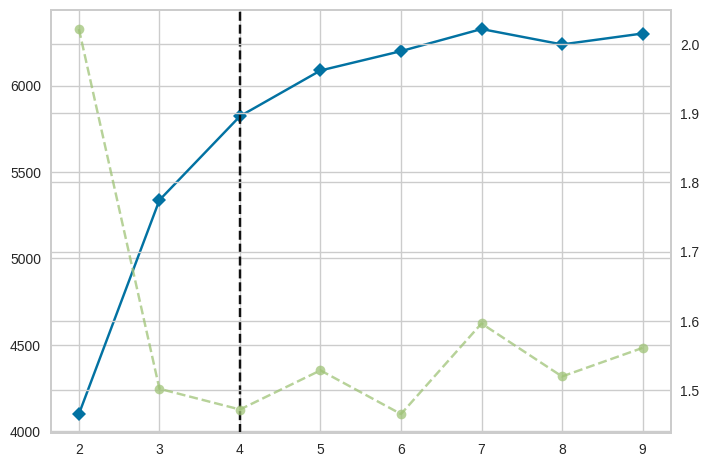

In [44]:
visualizer2 = KElbowVisualizer(model ,k=(2,10), metric='calinski_harabasz', timings = True,locate_elbow = True)
visualizer2.fit(X)
visualizer.show()
plt.show()

**Insight:** Berdasarkan hasil dari metode elbow dan Calinski Harabasz score di atas, dapat disimpulkan bahwa jumlah clustering terbaik untuk algoritma K-Means adalah 4 cluster.

In [45]:
# fitting model
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

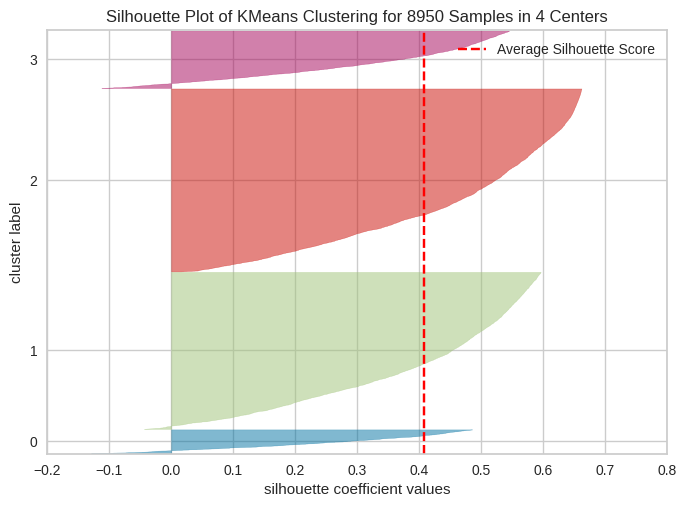

In [46]:
# Silhouette score computes the density of clusters
visualizer3 = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer3.fit(X)
visualizer3.show()
plt.show()

**Insight:** Visualisasi diatas memberi tahu seberapa baik pengelompokan itu. Skor minimum adalah 0, ini menunjukkan pengelompokan yang lebih baik. Di sini hasilnya menunjukkan bahwa pemisahan cluster kurang.

In [47]:
# centroid cluster
centroid = kmeans.cluster_centers_
centroid

array([[ 5.96705841,  0.67436152],
       [ 0.87566292, -1.17235955],
       [-1.37638307, -0.15784892],
       [-0.52095654,  3.47224029]])

In [48]:
y_means = pd.DataFrame(index = y_kmeans)
y_means = y_means.rename(index = {0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4'})
y_means.reset_index(level = 0,inplace = True)
y_means = y_means.rename(columns = {'index':'Labels'})
y_means.head(2)

,Labels
0,Cluster 3
1,Cluster 4


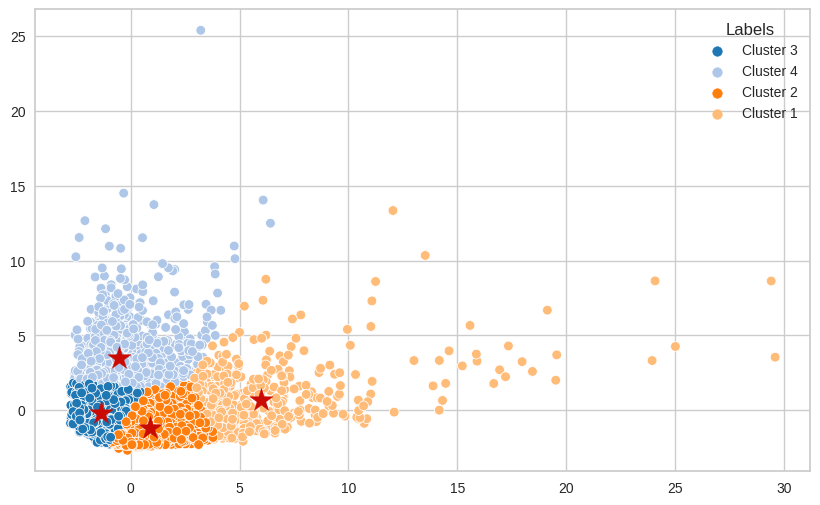

In [49]:
# visualisasi cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_means['Labels'], palette='tab20')
plt.scatter(centroid[:,0], centroid[:,1], marker='*', s=300, c='r')
plt.show()

**Insight:** Visualisasi diatas mengilustrasikan nilai koefisien siluet masing-masing cluster, distribusi masing-masing cluster dalam scatter plot, dan jumlah pelanggan dalam satu cluster. Dari silhouette cluster, nilai silhouette masing-masing cluster berada di atas rata-rata, yang menunjukkan semua cluster sudah optimal. Selain itu, dari fluktuasi ukuran plot siluet, semua cluster memiliki fluktuasi yang hampir sama. Namun, dari ketebalannya, cluster 2 dan 3 memiliki konsistensi yang lebih tebal dibandingkan dengan cluster lainnya.

Cluster 2 dan 3 memiliki kekentalan yang lebih tinggi. Hal ini dikarenakan sebagian besar titik data terletak di pojok kiri bawah scatter plot, dan jumlah pelanggan di kedua cluster tersebut lebih dari 35%. Selain itu, Algoritma K-Means mengasumsikan bahwa data outlier adalah bagian dari cluster 1 dan 4, di mana outlier pada sumbu x merupakan bagian dari cluster 1, dan pencilan pada sumbu y merupakan bagian dari cluster 4.

In [50]:
def evaluate_clustering(X, y):
    y = np.ravel(y)  # Mengubah vektor y menjadi bentuk (n_samples, )
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)

    print(f"Davies-Bouldin Index: {db_index}")
    print(f"Silhouette Score: {s_score}")
    print(f"Calinski-Harabasz Index: {ch_index}")
    return db_index, s_score, ch_index

#Evaluasi Clustering Quality
db_index, s_score, ch_index = evaluate_clustering(X, y_means)

Davies-Bouldin Index: 0.801
Silhouette Score: 0.408
Calinski-Harabasz Index: 5821.894


**Insight:** Berdasarkan nilai evaluasi di atas, kualitas pengelompokan menggunakan K-Means dengan 4 klaster adalah cukup baik. Hal ini disebabkan karena adanya overlapping antar cluster,

# DBScan

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah sebuah metode clustering yang berfokus pada kepadatan data. Metode ini mengelompokkan data berdasarkan kepadatan data yang tinggi di sekitarnya. DBSCAN mampu mengidentifikasi klaster yang memiliki kepadatan yang tinggi serta dapat menangani data yang memiliki bentuk klaster yang kompleks dan berbentuk non-lingkaran.

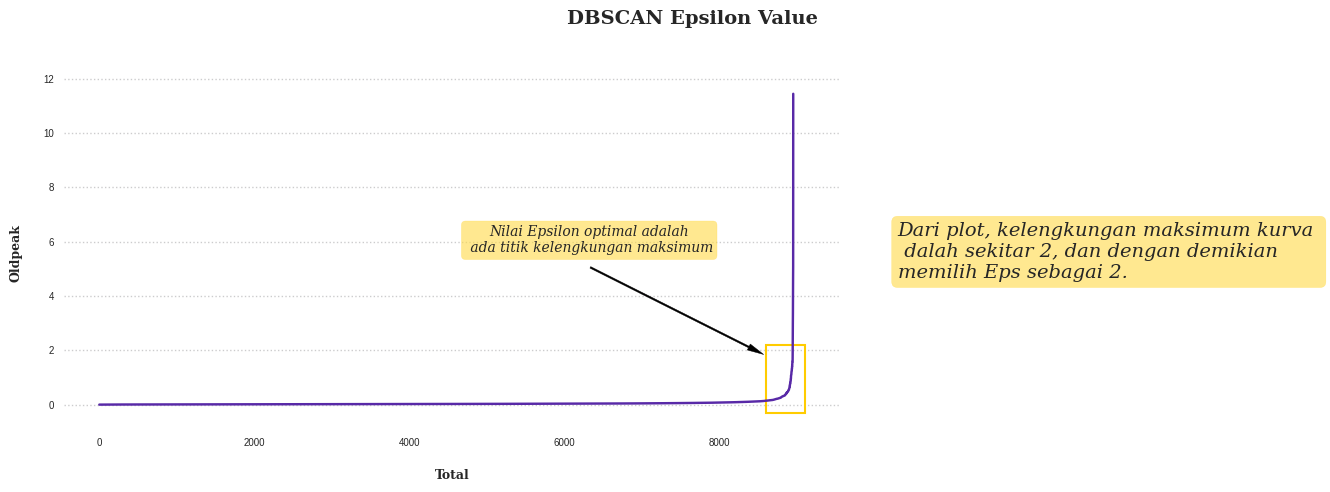

In [51]:
from matplotlib.patches import Rectangle

def epsilon():
    
    # Calculate Nearest Neighbors 
    neighbors=NearestNeighbors(n_neighbors=2)
    nbrs=neighbors.fit(X)
    distances, indices=nbrs.kneighbors(X)
    distances=np.sort(distances, axis = 0)
    
    # Figure Settings
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt1=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    txt2=dict(textcoords='offset points', va='center', fontfamily='serif', style='italic')
    kw=dict(arrowstyle='Simple, tail_width=0.1, head_width=0.4, head_length=1', color='black')
    text_style=dict(fontweight='bold', fontfamily='serif')
    fig=plt.figure(figsize=(14, 5))
    
    # Epsilon Plot
    distances_1=distances[:, 1]
    ax1=fig.add_subplot(1, 3, (1, 2))
    plt.plot(distances_1, color='#5829A7')
    plt.xlabel('\nTotal', fontsize=9, **text_style)
    plt.ylabel('Oldpeak\n', fontsize=9, **text_style)
    ax1.add_patch(Rectangle((8600, -0.3), 500, 2.5, edgecolor='#FFCC00', fill=False, lw=1.5))
    plt.annotate('Nilai Epsilon optimal adalah\n ada titik kelengkungan maksimum', xy=(6300, 6), xytext=(1, 1), fontsize=10, bbox=bbox, **txt1)
    plt.annotate('', xy=(8600, 1.8), xytext=(6300, 5.1), arrowprops=kw)
    for spine in ax1.spines.values():
        spine.set_color('None')
    plt.grid(axis='y', alpha=0.5, color='#9B9A9C', linestyle='dotted')
    plt.grid(axis='x', alpha=0)
    plt.tick_params(labelsize=7)
    
    #  Explanations
    ax2=fig.add_subplot(1, 3, 3)
    plt.annotate('Dari plot, kelengkungan maksimum kurva \n dalah sekitar 2, dan dengan demikian \nmemilih Eps sebagai 2.', xy=(0.1, 0.5), xytext=(1, 1), fontsize=14, bbox=bbox, **txt2)
    for spine in ax2.spines.values():
        spine.set_color('None')
    plt.grid(axis='both', alpha=0)
    plt.axis('off')
    
    plt.suptitle('DBSCAN Epsilon Value\n', fontsize=14, **text_style)
    plt.tight_layout()
    plt.show();

# Panggil fungsi epsilon
epsilon();

In [52]:
#Implementing DBSCAN
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

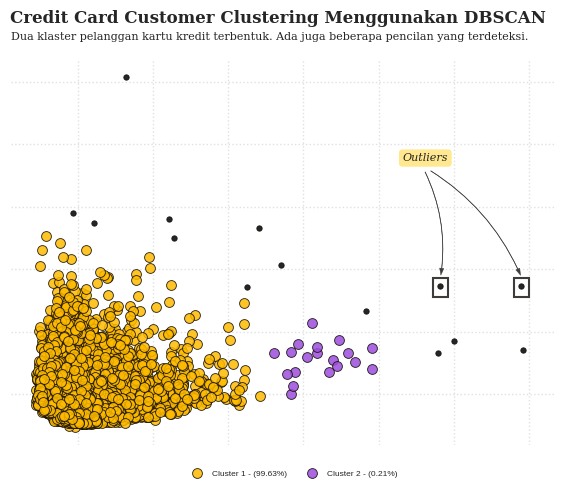

In [53]:
# DBSCAN Result Distribution
def dbscan_visualizer(dbscan, y_dbscan):
    
    # Figures Settings
    cluster_colors=['#FFBB00', '#9D4EDD', 'black']
    labels = ['Cluster 1', 'Cluster 2', 'Outliers']
    suptitle=dict(fontsize=12, fontweight='heavy', fontfamily='serif')
    title=dict(fontsize=8, fontfamily='serif')
    scatter_style=dict(linewidth=0.65, edgecolor='#100C07', alpha=0.85)
    bbox=dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
    txt=dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
    legend_style=dict(borderpad=2, frameon=False, fontsize=6)
    
    #Arrow Settings 
    style = 'Simple, tail_width=0.3, head_width=3, head_length=5'
    kw = dict(arrowstyle=style, color='#3E3B39')
    arrow1 = patches.FancyArrowPatch((23, 18), (24.1, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
    arrow2 = patches.FancyArrowPatch((23.3, 18), (29.5, 9.3), connectionstyle='arc3, rad=-0.16', **kw)
    
    # Persentase Label
    unique, counts = np.unique(y_dbscan, return_counts=True)
    dbscan_count = dict(zip(unique, counts))
    total = sum(dbscan_count.values())
    dbscan_label = {key: round(value/total*100, 2) for key, value in dbscan_count.items() if key != -1}

    # Distribusi Clustering
    y_dbscan_labels = list(set(y_dbscan.tolist()))
    fig, ax = plt.subplots(1, 1, figsize=(7, 5))
    for i in np.arange(0, 2, 1):
        plt.scatter(X[y_dbscan==i, 0], X[y_dbscan == i, 1], s=50, c=cluster_colors[i], label=labels[i], **scatter_style)
    plt.scatter(X[y_dbscan==-1, 0], X[y_dbscan == -1, 1], s=15, c=cluster_colors[2], label=labels[2], **scatter_style)
    for spine in ax.spines.values():
        spine.set_color('None')
    plt.legend([f"Cluster {i+1} - ({k}%)" for i, k in dbscan_label.items()], bbox_to_anchor=(0.75, -0.01), ncol=3, **legend_style)
    plt.grid(axis='both', alpha=0.3, color='#9B9A9C', linestyle='dotted')
    ax.add_patch(Rectangle((29, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
    ax.add_patch(Rectangle((23.6, 7.8), 1, 1.5, edgecolor='#3E3B39', fill=False, lw=1.5))
    ax.add_patch(arrow1)
    ax.add_patch(arrow2)
    plt.annotate('Outliers', xy=(23, 18.8), xytext=(1, 1), fontsize=8, bbox=bbox, **txt)
    plt.tick_params(left=False, right=False , labelleft=False , labelbottom=False, bottom=False)
    plt.title('Dua klaster pelanggan kartu kredit terbentuk. Ada juga beberapa pencilan yang terdeteksi.\n', loc='left', **title)
    plt.suptitle('Credit Card Customer Clustering Menggunakan DBSCAN', x=0.123, y=0.98, ha='left', **suptitle)
    plt.show();
    
# Panggil DBSCAN Functions
dbscan_visualizer(dbscan, y_dbscan);

**Insight:** Dari implementasi DBSCAN, terdapat 2 cluster yang terbentuk. Cluster 1 memiliki titik data yang paling banyak dibandingkan dengan cluster 2. Namun, terdapat beberapa outlier yang terdeteksi karena beberapa titik terlalu jauh dari titik data yang lain

In [54]:
# Evaluasi kualiats clustering DBSCAN
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

Davies-Bouldin Index: 1.287
Silhouette Score: 0.803
Calinski-Harabasz Index: 685.277


**Insight:** Kualitas pengelompokan menggunakan DBSCAN dengan dua cluster dan outlier cukup baik menurut skor evaluasi di atas. Skor silhouette lebih baik daripada K-Means karena ada satu cluster besar dan satu cluster kecil yang terbentuk, meskipun indeks Davies-Bouldin lebih tinggi daripada K-Means, yang mengindikasikan pengelompokan yang adil. Namun, indeks Calinski-Harabasz yang diperoleh jauh lebih rendah daripada K-Means.

# K-Medoid

K-Medoid yaitu salah satu algoritma clustering yang menggunakan pendekatan partisi. Algoritma ini merupakan pengembangan dari algoritma K-Means. Perbedaan utama antara K-Means dan K-Medoid adalah bahwa K-Means menggunakan mean (rata-rata) dari objek-objek data untuk menentukan posisi pusat cluster, sedangkan K-Medoid menggunakan medoid (objek data yang paling representatif) untuk menentukan posisi pusat cluster.

In [55]:
# kmedoids
from sklearn_extra.cluster import KMedoids

# cek berapa banyak cluster yang dapat dibuat
def kmedoids_cluster(X):
    k = []
    for i in range(1, 11):
        kmedoids = KMedoids(n_clusters=i, random_state=42).fit(X)
        k.append(kmedoids.inertia_)
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 11), k, 'o-')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

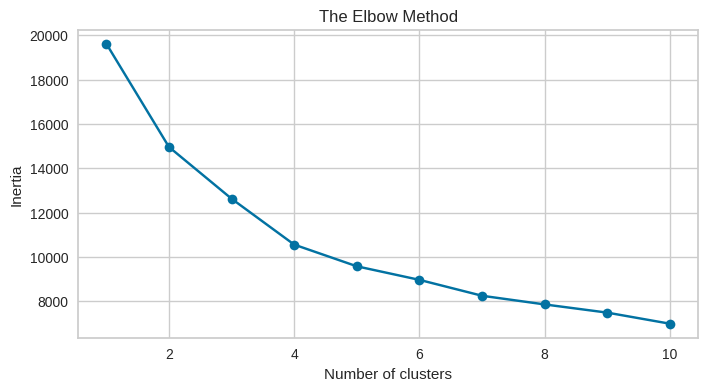

In [56]:
# panggil fungsi
kmedoids_cluster(X)

calinski_harabasz_score

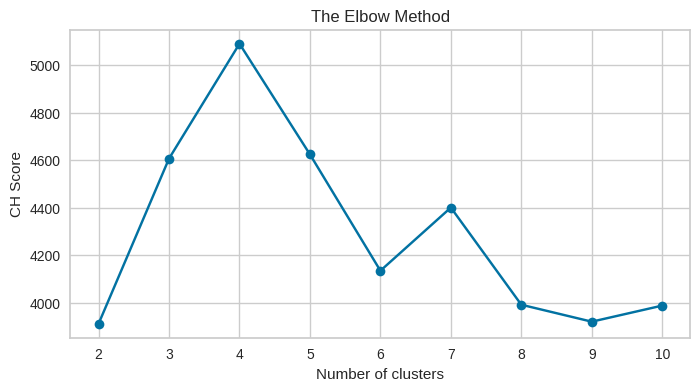

In [57]:
# celinski harabasz score kmedoids
def ch_score_kmedoids(X):
    ch_score = []
    for i in range(2, 11):
        kmedoids = KMedoids(n_clusters=i, random_state=42).fit(X)
        labels = kmedoids.labels_
        ch_score.append(calinski_harabasz_score(X, labels))
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, 11), ch_score, 'o-')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('CH Score')
    plt.show()

# panggil fungsi
ch_score_kmedoids(X)

In [58]:
# fitting model
kmedoids = KMedoids(n_clusters=4, random_state=42).fit(X)
y_kmedoids = kmedoids.labels_

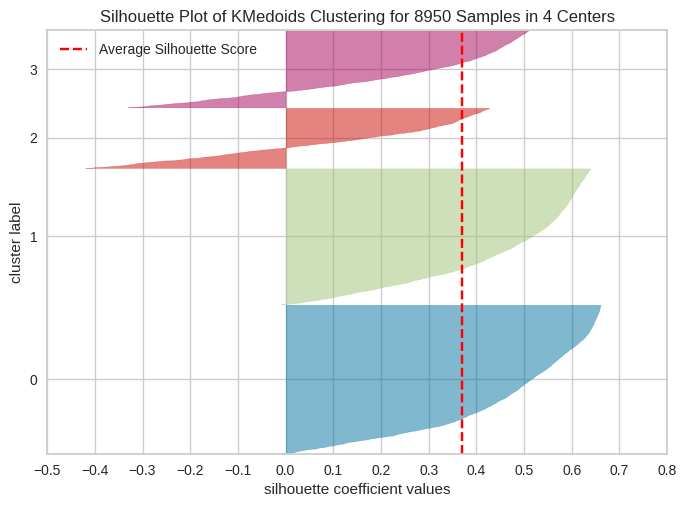

In [59]:
# Silhouette score computes
visk = SilhouetteVisualizer(kmedoids, colors = 'yellowbrick')
visk.fit(X)
visk.show();

In [60]:
# centroids cluster k-medoids
print('Centroids: \n', kmedoids.cluster_centers_)

Centroids: 
 [[-1.46172442 -0.32554065]
 [ 0.3053289  -1.38815329]
 [ 3.02286792 -0.41372008]
 [-1.06258895  2.43962725]]


In [61]:
y_medoid = pd.DataFrame({'Cluster': y_kmedoids})
y_medoid['Labels'] = y_medoid['Cluster'].replace({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'})
y_medoid = y_medoid[['Labels', 'Cluster']]
y_medoid.head(2)

,Labels,Cluster
0,Cluster 1,0
1,Cluster 4,3


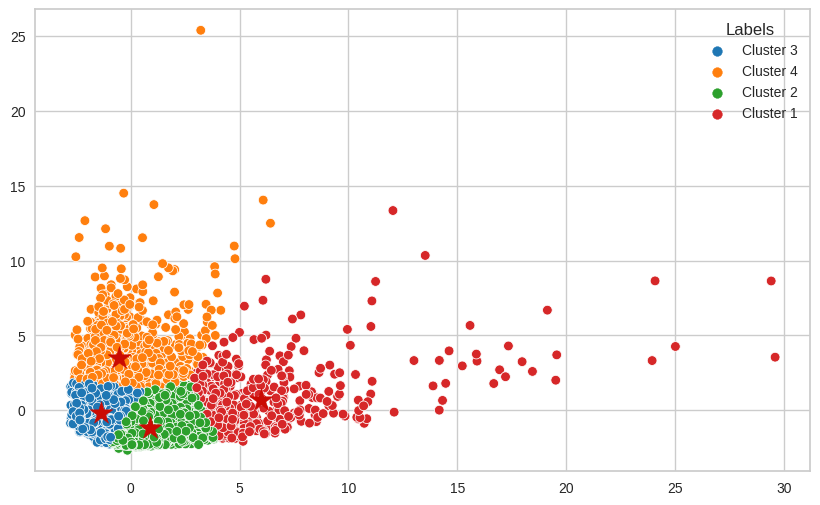

In [62]:
# visualisasi cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_means['Labels'], palette='tab10')
plt.scatter(centroid[:,0], centroid[:,1], marker='*', s=300, c='r')
plt.show()

**Insight:** Dari implementasi K-Medoid, terdapat 4 cluster yang terbentuk. Cluster 1 memiliki titik data yang paling banyak dibandingkan dengan cluster lainnya. Namun, terdapat beberapa outlier yang terdeteksi karena beberapa titik terlalu jauh dari titik data yang lain. Selain itu, terdapat beberapa titik data yang terletak di antara cluster 1 dan 2, yang mengindikasikan adanya overlapping antar cluster. Hal ini disebabkan karena algoritma K-Medoid tidak dapat menangani data yang memiliki pola yang kompleks.

In [63]:
# Evaluasi kualitas cluster k-medoids
db_kmedoids, ss_kmedoids, ch_kmedoids = evaluate_clustering(X, y_kmedoids)

Davies-Bouldin Index: 0.825
Silhouette Score: 0.37
Calinski-Harabasz Index: 5090.155


**Insight:** nilai-nilai metrik evaluasi yang Anda berikan menunjukkan hasil yang baik untuk pengelompokan yang dilakukan dengan K-Medoid.

# Model Evaluation

In [64]:
# MODEL EVALUATION
compare = pd.DataFrame({'Model': ['K-Means', 'DBSCAN', 'k-Medoids'], 
                        'Davies-Bouldin Index': [db_index, db_dbscan, db_kmedoids],
                        'Silhouette Score': [s_score, ss_dbscan, ss_kmedoids],
                       'Calinski-Harabasz Index': [ch_index, ch_dbscan, ch_kmedoids]})

# model evaluation
print('Model Evaluation:\n' + 80*'=')
print(compare)

Model Evaluation:
       Model  Davies-Bouldin Index  Silhouette Score  Calinski-Harabasz Index
0    K-Means                 0.801             0.408                 5821.894
1     DBSCAN                 1.287             0.803                  685.277
2  k-Medoids                 0.825             0.370                 5090.155


***Insight:*** Dari hasil evaluasi model di atas, dapat disimpulkan bahwa algoritma K-Means adalah algoritma yang paling baik untuk melakukan segmentasi pelanggan. Hal ini dikarenakan algoritma K-Means memiliki nilai evaluasi yang lebih baik dibandingkan dengan algoritma DBSCAN dan K-Medoid. Selain itu, algoritma K-Means juga memiliki nilai indeks Calinski-Harabasz yang lebih tinggi dibandingkan dengan algoritma DBSCAN dan K-Medoid, yang mengindikasikan bahwa algoritma K-Means memiliki kualitas pengelompokan yang lebih baik.

# Model Inference

In [65]:
# uji model k-means dengan data baru - segmentasi pelanggan masuk ke cluster mana dengan fitur yang di input yaitu 2 fitur terbaik yaitu 'BALANCE' dan 'PURCHASES'
# buat data baru
data = [[40.900749, 95.400000]]

# buat dataframe
new_data = pd.DataFrame(data, columns=['BALANCE', 'PURCHASES'])

# prediksi cluster
new_data['Cluster'] = kmeans.predict(new_data)

# lihat hasil
new_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,BALANCE,PURCHASES,Cluster
0,40.900749,95.4,3


**Insight:** Hasil uji data baru diatas menunjukkan bahwa data baru tersebut masuk ke cluster 3. Hal ini dikarenakan data baru tersebut memiliki nilai yang mirip dengan data pada cluster 3.

# Cluster Profiling

In [66]:
# Add K-Means Prediksi ke Data Frame
df['Cluster'] = y_kmeans
df['Cluster'] = df['Cluster'].replace({0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4'})

# Rata-Rata tiap Cluster
df_cluster_summary = df.groupby('Cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# Gabungkan Data Frame
print('Profile of Each Cluster:\n' + 80*'=')
df_profile = df_cluster_summary.reset_index()
df_profile.style.background_gradient(cmap='YlGnBu').hide(axis='index')


Profile of Each Cluster:


Column Name,Metrics,Cluster 1,Cluster 2,Cluster 3,Cluster 4
BALANCE,mean,3398.264604,811.381815,1035.864443,4552.760245
BALANCE_FREQUENCY,mean,0.988541,0.916259,0.801996,0.964401
PURCHASES,mean,6859.023406,1221.694360,218.542181,466.568028
ONEOFF_PURCHASES,mean,4490.528287,613.641768,155.708498,302.390205
INSTALLMENTS_PURCHASES,mean,2369.676220,608.254417,63.165337,164.279441
CASH_ADVANCE,mean,769.743916,145.852957,634.997248,4448.879154
PURCHASES_FREQUENCY,mean,0.954891,0.856824,0.184810,0.267697
ONEOFF_PURCHASES_FREQUENCY,mean,0.728209,0.298187,0.073967,0.131005
PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.809186,0.669874,0.105849,0.167408
CASH_ADVANCE_FREQUENCY,mean,0.084464,0.030456,0.125563,0.473964


**Insight:** 
- Cluster 1 = Nasabah yang termasuk dalam klaster ini adalah pengguna aktif kartu kredit bank.
- Cluster 2 = Nasabah jarang/hampir tidak pernah menggunakan kartu kredit untuk transaksi dan cicilan.
- Cluster 3 = Nasabah yang menggunakan kartu kredit untuk tujuan cicilan.
- Cluster 4 = Nasabah yang menggunakan kartu kredit untuk tarik tunai

**Saran Strategi Marketing:**
- Cluster 1 = Nasabah yang berada di Cluster 1 dapat menjadi target utama pemasaran kartu kredit. Dengan memfokuskan pemasaran pada klaster ini, bank dapat meningkatkan keuntungan mereka. Bank dapat menawarkan keuntungan atau reward atas penggunaan kartu kredit untuk menarik nasabah agar lebih sering menggunakan kartu kredit.
- Cluster 2 = Bank dapat menawarkan kartu kredit khusus untuk pemula atau pelajar kartu kredit pemula yang mungkin tidak memiliki profil kredit yang luas.Kartu kredit ini dapat digunakan untuk membangun kredit mereka dan belajar bagaimana menggunakan kartu kredit secara bertanggung jawab.
- Cluster 3 = Untuk kartu kredit khusus cicilan, bank dapat memfokuskan pemasarannya pada nasabah yang berada di klaster 3. Hal ini dikarenakan nasabah pada klaster 3 lebih banyak melakukan transaksi kartu kredit untuk keperluan cicilan.
- Cluster 4 = Karena nasabah di klaster 4 cenderung melakukan tarik tunai, bank dapat menawarkan kartu kredit khusus dengan berbagai keuntungan. Keuntungan tersebut dapat berupa biaya tarik tunai atau biaya administrasi yang rendah atau tidak ada sama sekali, bunga yang rendah, tenor yang relatif tinggi, dan lain-lain.

# Kesimpulan

Dalam prosesnya dataset ini memiliki skewness dan outlier, tetapi outliers tersebut terlihat seperti natural outliers bukan terjadi karena kesalahan input atau pengukuran.Sehingga kita bisa biarkan saja. Dalam visualisasi data ditemukan bahwa nasabah kartu kredit dengan masa tenor 12 bulan bersedia mengambil jumlah pembelian dan memiliki total transaksi pembelian yang lebih banyak dibandingkan dengan nasabah dengan masa tenor lainnya. Dimana nasabah lebih cenderung membayar utang dalam jangka waktu yang lama, guna menaikkan suku bunga. Dalam proses scalling, project ini menggunakan teknik Standar Scaller yang kemudian dilanjutkan dengan uji statistika Hopkins.PCA (Principal Component Analysis) diterapkan dengantujuan untuk mengurangi dimensi data dengan memproyeksikan data yang ada ke dalam ruang yang lebih rendah namun mempertahankan sebanyak mungkin informasi yang terkandung dalam data tersebut. Dan disini kami menerapkan beberapa algoritma clustering diantaranya K-Means, DBScan, dan K-Medoid. Dimana nantinya akan diambil satu algoritma yang optimal untuk project ini. Pada K-Means disini kami terapkan 4 cluster, DBScan 2 cluster, dan K-medoid 4 cluster. Hasil pengujian dari 3 model diatas yaitu:
1. Model: K-Means
Davies-Bouldin Index: 0.801
Silhouette Score: 0.408
Calinski-Harabasz Index: 5821.894

2. Model: DBSCAN
Davies-Bouldin Index: 1.287
Silhouette Score: 0.803
Calinski-Harabasz Index: 685.277

3. Model: k-Medoids
Davies-Bouldin Index: 0.825
Silhouette Score: 0.370
Calinski-Harabasz Index: 5090.155

Sehingga dapat disimpulkan bahwa algoritma K-Means adalah algoritma yang paling baik untuk melakukan segmentasi pelanggan. Hal ini dikarenakan algoritma K-Means memiliki nilai evaluasi yang lebih baik dibandingkan dengan algoritma DBSCAN dan K-Medoid. Selain itu, algoritma K-Means juga memiliki nilai indeks Calinski-Harabasz yang lebih tinggi dibandingkan dengan algoritma DBSCAN dan K-Medoid, yang mengindikasikan bahwa algoritma K-Means memiliki kualitas pengelompokan yang lebih baik. 

Selanjutnya dilakukan pengujian model clustering K-Means dengan data random yaitu BALANCE = 40.900749 dan PURCHASES = 95.400000. Hasil prediksinya menujukkan bahwa pelanggan masuk ke Cluster 3. Penjelasan karakteristik tiap clusternya yaitu:
- Cluster 1 = Nasabah yang termasuk dalam klaster ini adalah pengguna aktif kartu kredit bank.
- Cluster 2 = Nasabah jarang/hampir tidak pernah menggunakan kartu kredit untuk transaksi dan cicilan.
- Cluster 3 = Nasabah yang menggunakan kartu kredit untuk tujuan cicilan.
- Cluster 4 = Nasabah yang menggunakan kartu kredit untuk tarik tunai

**Saran Strategi Marketing:**
- Cluster 1 = Nasabah yang berada di Cluster 1 dapat menjadi target utama pemasaran kartu kredit. Dengan memfokuskan pemasaran pada klaster ini, bank dapat meningkatkan keuntungan mereka. Bank dapat menawarkan keuntungan atau reward atas penggunaan kartu kredit untuk menarik nasabah agar lebih sering menggunakan kartu kredit.
- Cluster 2 = Bank dapat menawarkan kartu kredit khusus untuk pemula atau pelajar kartu kredit pemula yang mungkin tidak memiliki profil kredit yang luas.Kartu kredit ini dapat digunakan untuk membangun kredit mereka dan belajar bagaimana menggunakan kartu kredit secara bertanggung jawab.
- Cluster 3 = Untuk kartu kredit khusus cicilan, bank dapat memfokuskan pemasarannya pada nasabah yang berada di klaster 3. Hal ini dikarenakan nasabah pada klaster 3 lebih banyak melakukan transaksi kartu kredit untuk keperluan cicilan.
- Cluster 4 = Karena nasabah di klaster 4 cenderung melakukan tarik tunai, bank dapat menawarkan kartu kredit khusus dengan berbagai keuntungan. Keuntungan tersebut dapat berupa biaya tarik tunai atau biaya administrasi yang rendah atau tidak ada sama sekali, bunga yang rendah, tenor yang relatif tinggi, dan lain-lain.